In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas
import mplcursors
import os

In [18]:
# get data from excel

def autolabel(rects, player_list, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i = 0
    for rect in rects:
        height = rect.get_height() + 0.5
        ax.annotate('{}'.format(player_list[i]),
                    xy=(rect.get_x() + rect.get_width() / 2, height - 1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        i+= 1



In [26]:
def make_chart2(player, stat, player_type):
    comparison_labels = ['G']
    comparison_labels.append(stat)


    col = ["Name", "Season"]
    for item in comparison_labels:
        col.append(item)


    x = []
    y1 = []
    y2 = []


    reader = csv.reader(open('batting_data_1996_2020_with_risk.csv'))
    df = pandas.read_csv('batting_data_1996_2020_with_risk.csv', usecols = lambda column : column in col)


    for i in range(len(df)):
        if (df['Name'][i] == player):
            x.append(df['Season'][i]) #append season to x
            y1.append(df[comparison_labels[0]][i]) #append games to y1
            y2.append(df[comparison_labels[1]][i]) #append stat to y2


    fig, ax1 = plt.subplots()

    y1max = max(y1)


    ax1.set_title(player + "'s " + comparison_labels[1] + " statistics")
    ax2 = ax1.twinx()
    ax1.plot(x, y1, 'o', color = 'royalblue', pickradius = 5 )
    #ax2.plot(x, y2, 'o', color = 'r')

    ax1.set_ylim(0, y1max * 1.2)
    ax1.set_xlabel('Year')
    ax1.set_ylabel(comparison_labels[0], color='b')
    ax1.tick_params(axis='y', colors='b')
    ax2.set_ylabel(comparison_labels[1], color='r')
    ax2.tick_params(axis='y', colors='r')
    width = 0.5  # the width of the bars
    rects2 = ax2.bar(x, y2, width = width, color = 'tomato')

    scale_factor = 0.4
    ymin = min(y2)
    ymax = max(y2)

    ax2.set_ylim(ymin * scale_factor, ymax * (1 + scale_factor))
    #mplcursors.cursor(hover=True)

    autolabel(rects2, y2, ax2)

    plt.show()





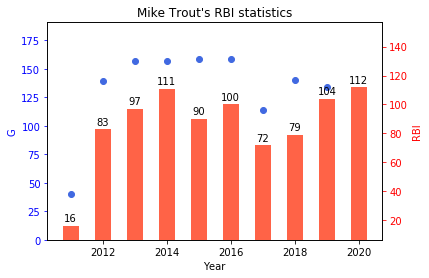

In [27]:
make_chart2('Mike Trout', 'RBI', 'Bat')

In [13]:
os.chdir('/Users/rmbuch/Desktop/fantasy_baseball/fantasy_baseball')